In [12]:
import pandas as pd
from bs4 import BeautifulSoup

# Load the local HTML file
with open("tesla_revenue.html", "r") as file:
    html_data = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Initialize a list to collect rows of data
data = []

# Extract revenue data from the table
try:
    table = soup.find_all('tbody')[1]  # Select the second table
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace(',', '').replace('$', '')
            data.append([date, revenue])
except IndexError as e:
    print(f"Error parsing data from the HTML content: {e}")

# Convert the list to a DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Convert 'Revenue' to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Convert 'Date' to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Display the last five rows
print(tesla_revenue.tail())


         Date  Revenue
55 2010-06-30     28.0
56 2010-03-31     21.0
57 2009-12-31      NaN
58 2009-09-30     46.0
59 2009-06-30     27.0


In [14]:
# Install yfinance library
# !pip install yfinance

import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme_data = yf.download("GME", start="2020-01-01", end="2023-01-01")

# Reset the index
gme_data.reset_index(inplace=True)

# Save the DataFrame to a CSV file
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
print(gme_data.head())




[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


In [18]:
import pandas as pd
from bs4 import BeautifulSoup

# Load the local HTML file
with open("GME_Revenue.html", "r") as file:
    html_data = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Initialize a list to collect rows of data
data = []

# Find the table containing revenue data
table = soup.find_all('table')[1]  # Assuming the second table contains the revenue data

# Extracting the data
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')
        data.append([date, revenue])

# Convert the data to a DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Convert 'Revenue' to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Convert 'Date' to datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Display the last five rows
print(gme_revenue.tail())


         Date  Revenue
57 2010-01-31     3524
58 2009-10-31     1835
59 2009-07-31     1739
60 2009-04-30     1981
61 2009-01-31     3492


In [19]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


[*********************100%%**********************]  1 of 1 completed


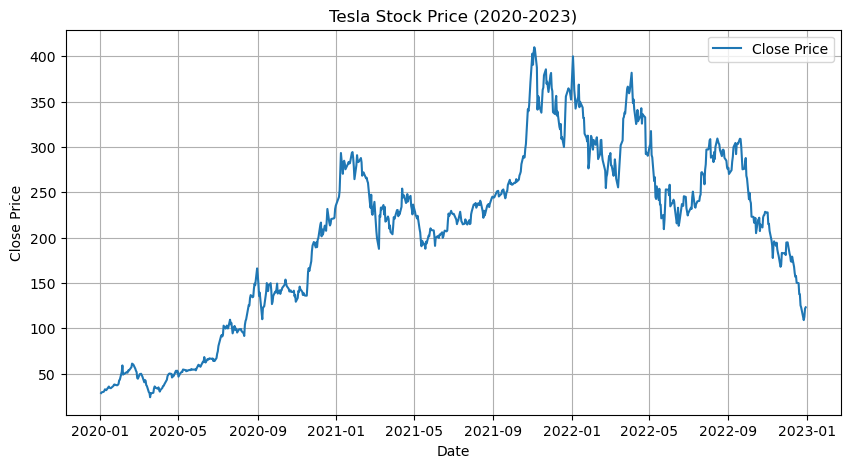

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")

# Reset the index to ensure 'Date' is a column
tesla_data.reset_index(inplace=True)

# Call the make_graph function to plot the graph
make_graph(tesla_data, 'Tesla Stock Price (2020-2023)')

[*********************100%%**********************]  1 of 1 completed


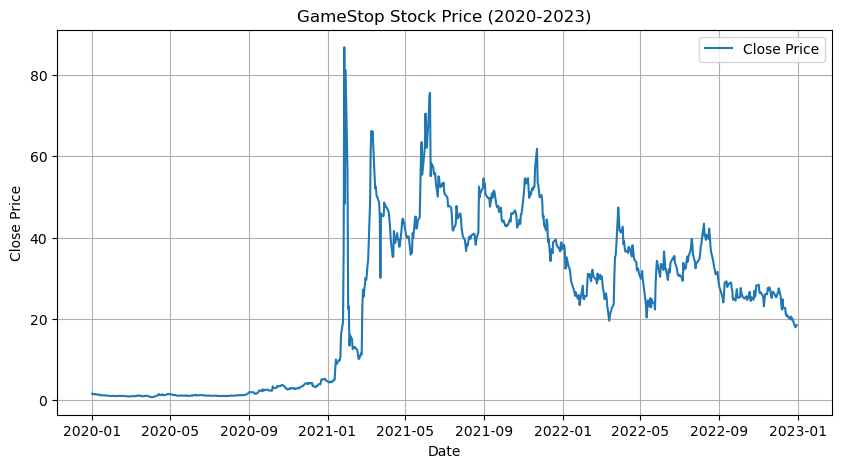

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download GameStop stock data
gme_data = yf.download("GME", start="2020-01-01", end="2023-01-01")

# Reset the index to ensure 'Date' is a column
gme_data.reset_index(inplace=True)

# Call the make_graph function to plot the graph
make_graph(gme_data, 'GameStop Stock Price (2020-2023)')
